# Unity Index

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *
import pdb
n = 25

In [39]:
def colores(n):
    from random import randint
    colors = []
    for i in range(n):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    return(colors)

In [40]:
df = pd.read_csv('TopUnity_Data.csv', encoding = 'latin-1', sep=';')

In [41]:
def TopUnity(df,cr_file):
    '''
    This function calculates the TopUnity indez design/created by Plata C. 
    The script is written by Casallas A and works like this:
    Input the excel or csv file. The file have to contain as columns the Authors names, number of articles,
    number of citations and h_index.
    The script calculates the TopUnity index and the Gain, which is return as a new DataFrame and as a 
    csv file. For information related to the index contact: carlos.plata@tsm-education.fr, and for information of the 
    code contact: acasalla@ictp.it
    '''
    top = np.ones([len(df.columns), len(df)])
    for i,col in enumerate(df.columns[1:]):
        top[i,:] = df[col].rank(method='min', ascending = False)
    unity = top[0,:] + top[1,:] + top[2,:]
    TopU = pd.DataFrame(np.column_stack((df['Authors'],unity)), columns = ['Authors','Unity'])
    uni_sort = TopU['Unity'].rank(method='min', ascending = True)
    TopUni = pd.DataFrame(np.column_stack((df['Authors'],df['Articles'],df['LocalCitations'],df['h_index'],
                                           top[0,:], top[1,:],top[2,:],unity,uni_sort,top[0,:]-uni_sort)), 
                          columns = ['Authors','Articles','LocalCitations','h_index',
                                     'TopArt','TopCit','TopH','Suma','TopUnity','Gain'])
    TopUni.to_csv('TopUnity_file.csv')
    return(TopUni)

def plot_TopUnity(TopUni,n):
    '''
    This function calculates the TopUnity indez design/created by Plata C. 
    The script is written by Casallas A and works like this:
    You input the TopUni DataFrame and the number of author to plot.
    The output is a scatter plot, where the legend is sort by TopUnity and the 
    size of the markers is the H-Index.
    For information related to the index contact:carlos.plata@tsm-education.fr, 
    and for information of the code contact: acasalla@ictp.it
    '''
    colors = colores(n)
    Top = TopUni.sort_values(by=['TopUnity'],ascending=True)
    xx = Top['Articles'][0:n]
    yy = Top['LocalCitations'][0:n]
    s = Top['h_index'][0:n]
    r = np.array(s)**3 + 400
    names = Top['Authors']
    plt.figure(figsize=(12,8))
    for i,val in enumerate(r):
        plt.scatter(np.array(xx)[i],np.array(yy)[i],s=r[i], color = colors[i], 
                    label = names[i], alpha = 0.5, edgecolor = 'k')
    plt.grid(linestyle=':')
    plt.xlabel('Number of Articles', fontsize = 12)
    plt.ylabel('Number of Citations', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.legend(ncol=1, bbox_to_anchor=(1.12,1.05), loc = 'upper center', frameon = False, fontsize = 12)

In [42]:
TopUni = TopUnity(df, False)

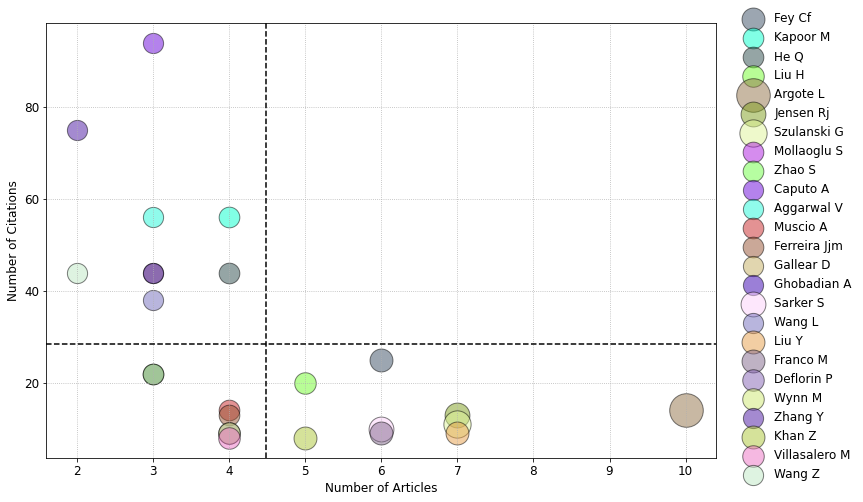

In [43]:
plot_TopUnity(TopUni,25)
plt.axhline(TopUni['LocalCitations'][0:n].mean(), color = 'k', linestyle = '--')
plt.axvline(TopUni['Articles'][0:n].mean(), color = 'k', linestyle = '--')